In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score,r2_score,max_error,mean_absolute_error,median_absolute_error,mean_squared_error
from math import sqrt
import joblib
%matplotlib inline

In [75]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [76]:
init_notebook_mode(connected=True)
cf.go_offline()

In [77]:
df=pd.read_csv('ACETICACID.csv')

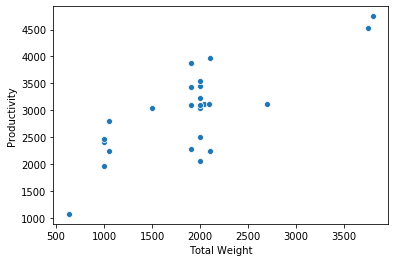

In [78]:
sns.scatterplot(x='Total Weight',y='Productivity',data=df)

In [79]:
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.0,27.000000,27.000000,27.000000,24.000000
mean,303.000000,193190.074074,13.714444,16.152593,1870.713037,0.019259,0.001926,0.0,1.001852,0.214074,2933.341481,13647.570000
std,168.932167,3183.449398,5.534401,6.739216,743.172767,0.007808,0.000781,0.0,3.765364,0.464826,806.291607,4302.679328
min,0.000000,190914.000000,0.000000,0.000000,630.881000,0.010000,0.001000,0.0,0.000000,0.000000,1078.940000,4874.000000
25%,195.000000,191334.000000,11.490000,13.250000,1274.984500,0.015000,0.001500,0.0,0.000000,0.000000,2348.890000,10607.250000
50%,364.000000,192014.000000,13.880000,16.150000,1999.265000,0.020000,0.002000,0.0,0.000000,0.000000,3050.940000,13730.000000
75%,415.000000,192891.500000,15.950000,20.925000,2067.764500,0.020000,0.002000,0.0,0.000000,0.000000,3325.935000,16558.000000
max,497.000000,200662.000000,23.200000,31.750000,3800.110000,0.040000,0.004000,0.0,18.920000,1.580000,4746.020000,20548.000000


In [80]:
X=df[['Total Weight']]
y=df['Productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [81]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
print(lm.intercept_)

1674.179186129112


In [83]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Total Weight,0.711932


In [84]:
predictions = lm.predict(X_test)

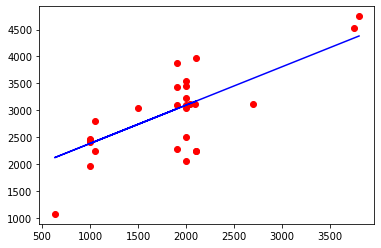

In [85]:
plt.scatter(X,y,color="red")
plt.plot(X_test, predictions, color="blue")

In [86]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))#Main
print('r2_score:',r2_score(y_test,predictions))

MAE: 435.9714219528084
MSE: 352517.1970125309
RMSE: 593.7315866724044
r2_score: 0.6229412427736518


In [87]:
joblib.dump(lm,"Acetic_Acid.pkl")#only execute if rmse is less than half of mean of productivity

['Acetic_Acid.pkl']